![Golden State Warriors 2014-2015](./img/los-warriors-sinonimo-de-exito.jpg)

# **El Efecto Curry**
#### *(o como los Golden State Warriors cambiaron la NBA por completo)*

## ***Índice***

[1. Introducción](#introduccion)

[2. Limpieza de datos](#limpieza)

[3. Análisis General](#general)

[4. Análisis por equipos](#equipos)

[5. Conclusión](#conclusiones)

## ***1. Introducción*** <a id="introduccion"></a>

Se realizan las importaciones necesarias.

In [255]:
import pandas as pd
import sqlite3
from bootcampviztools import *
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import clear_output

Defino una función para realizar la query por sqlite.

In [232]:
def sql_query(query):

    # Ejecuta la query
    cursor_clase.execute(query)
                                    

    # Almacena los datos de la query 
    ans = cursor_clase.fetchall()

    # Obtenemos los nombres de las columnas de la tabla
    names = [description[0] for description in cursor_clase.description]

    return pd.DataFrame(ans,columns=names)

### Hipótesis: A partir de la temporada **2014-2015** (primer anillo de los GSW), la NBA se compone de:
1. Más triples, con un mayor porcentaje de acierto
2. Menos tiros de 2 y menos pts de media distancia, lo considerado ahora menos eficiente
3. Más contraataques
4. Menos juego interior y en la zona
5. Partidos con más puntos

- Busqué por kaggle y encontré esta base de datos que se adecuaba a lo que buscaba: https://www.kaggle.com/datasets/wyattowalsh/basketball?rvi=1

#### La base de datos tenía diversos archivos csv:

- player: los jugadores que hay
- game_summary: resultado de los partidos de 1946 a 2022
- line_score: todos los partidos y los puntos por cuarto
- game: todos los partidos, quién jugo, porcentaje de tiros acertados, de 3, libres...
- other_stats: todos los partidos y los tipos de puntos (en pintura, 2a oportunidad, en contraataque), asistencias, rebotes y pérdidas totales...
- play_by_play: todos los eventos de cada partidos, hechos por x jugador en x minuto
------
- draft_combine_stats: todos los jugadores drafteados con sus características (de 2004 a 2023 sin 2006, 2016 y 2021)
- Common_player_info: todos los jugadores por orden alfabético y qué temporadas estuvieron
- draft_history: datos del draft históricos
- team: los equipos que existen

## Realizamos la query para obtener los datos necesarios:
* Todos los datos relacionados con puntos de todos los partidos entre 2006 y 2022

In [233]:
# Conectamos con la base de datos
connection = sqlite3.connect("./data/archive/nba.sqlite")
# Obtenemos un cursor que utilizaremos para hacer la query
cursor_clase = connection.cursor()

In [275]:
query = '''
SELECT a.matchup_home as Partido, b.team_abbreviation_home as Local, b.team_abbreviation_away as Visitante, c.season as "Temporada",
a.pts_home as "Puntos Local", a.pts_away as "Puntos Visitante",
b.pts_paint_home as "Puntos en zona Local", b.pts_2nd_chance_home as "Puntos 2a oportunidad Local", b.pts_fb_home as "Puntos en transición Local", 
a.fg3m_home as "Triples Local", a.fg3a_home as "Triples intentados Local", a.fg3_pct_home as "% triples Local",
a.ftm_home as "Tiros libres Local", a.fta_home as "Tiros libres intentados Local", a.ft_pct_home as "% tiros libres Local",
b.pts_paint_away as "Puntos en zona Visitante", b.pts_2nd_chance_away as "Puntos 2a oportunidad Visitante", b.pts_fb_away as "Puntos en transición Visitante", 
a.fg3m_away as "Triples Visitante", a.fg3a_away as "Triples intentados Visitante", a.fg3_pct_away as "% triples Visitante",
a.ftm_away as "Tiros libres Visitante", a.fta_away as "Tiros libres intentados Visitante", a.ft_pct_away as "% tiros libres Visitante"
FROM game as A
LEFT JOIN other_stats as B
ON a.game_id = b.game_id
LEFT JOIN game_summary as C
ON c.game_id = a.game_id
WHERE c.season BETWEEN 2006 AND 2022
'''
nba = sql_query(query)
nba

,Partido,Local,Visitante,Temporada,Puntos Local,Puntos Visitante,Puntos en zona Local,Puntos 2a oportunidad Local,Puntos en transición Local,Triples Local,Triples intentados Local,% triples Local,Tiros libres Local,Tiros libres intentados Local,% tiros libres Local,Puntos en zona Visitante,Puntos 2a oportunidad Visitante,Puntos en transición Visitante,Triples Visitante,Triples intentados Visitante,% triples Visitante,Tiros libres Visitante,Tiros libres intentados Visitante,% tiros libres Visitante
0,LAL vs. PHX,LAL,PHX,2006,114.0,106.0,66.0,9.0,25.0,6.0,12.0,0.500,16.0,24.0,0.667,34.0,8.0,20.0,13.0,30.0,0.433,13.0,17.0,0.765
1,MIA vs. CHI,MIA,CHI,2006,66.0,108.0,26.0,2.0,6.0,3.0,17.0,0.176,13.0,22.0,0.591,36.0,18.0,21.0,7.0,13.0,0.538,23.0,32.0,0.719
2,MEM vs. NYK,None,None,2006,117.0,118.0,NaN,NaN,NaN,6.0,21.0,0.286,27.0,45.0,0.600,NaN,NaN,NaN,10.0,22.0,0.455,28.0,36.0,0.778
3,NJN vs. TOR,TOR,NJN,2006,102.0,92.0,40.0,13.0,21.0,3.0,18.0,0.167,19.0,24.0,0.792,44.0,10.0,20.0,4.0,20.0,0.200,14.0,20.0,0.700
4,ORL vs. CHI,CHI,ORL,2006,109.0,94.0,38.0,11.0,9.0,6.0,8.0,0.750,33.0,42.0,0.786,44.0,10.0,17.0,6.0,20.0,0.300,14.0,24.0,0.583
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20044,LBN vs. GNS,LBN,GNS,2022,175.0,184.0,118.0,15.0,27.0,17.0,60.0,0.283,0.0,0.0,NaN,88.0,14.0,33.0,29.0,66.0,0.439,3.0,4.0,0.750
20045,LBN vs. GNS,LBN,GNS,2022,175.0,184.0,118.0,15.0,27.0,17.0,60.0,0.283,0.0,0.0,NaN,88.0,14.0,33.0,29.0,66.0,0.439,3.0,4.0,0.750
20046,LBN vs. GNS,LBN,GNS,2022,175.0,184.0,118.0,15.0,27.0,17.0,60.0,0.283,0.0,0.0,NaN,88.0,14.0,33.0,29.0,66.0,0.439,3.0,4.0,0.750
20047,LBN vs. GNS,LBN,GNS,2022,175.0,184.0,118.0,15.0,27.0,17.0,60.0,0.283,0.0,0.0,NaN,88.0,14.0,33.0,29.0,66.0,0.439,3.0,4.0,0.750


## ***2. Limpieza de datos*** <a id="limpieza"></a>

## Realizamos la limpieza necesaria:

* Eliminar los partidos del All-Star Weekend (para no falsear los datos en puntuación)

In [235]:
nba = nba[nba["Local"] != "EST"]
nba = nba[nba["Visitante"] != "EST"]
nba = nba[nba["Visitante"] != "LBN"]
nba = nba[nba["Local"] != "LBN"]
nba = nba[nba["Partido"] != "WST vs. EST"]

In [236]:
nba = nba.dropna(axis=0)

*CRIBADO (18283 datos)*
- Más triples, con un mayor porcentaje de acierto
- Partidos con más puntos
- Menos tiros de 2 y menos pts de media distancia, lo considerado ahora menos eficiente 
- Más contraataques
- Menos juego interior y en la zona

## Ahora creo la columna de tiros de 2 (media distancia) para cada partido, restando a los puntos totales los conseguidos en la zona, desde la línea de tiro libre y desde la linea de 3

In [237]:
nba["Puntos de media distancia Local"] = nba["Puntos Local"] - nba["Puntos en zona Local"] - nba["Tiros libres Local"] - nba["Triples Local"]*3
nba["Puntos de media distancia Visitante"] = nba["Puntos Visitante"] - nba["Puntos en zona Visitante"] - nba["Tiros libres Visitante"] - nba["Triples Visitante"]*3

Existen 2 años de los que no se tiene la misma cantidad de datos que los demás:
* De 2012 hay poquísimos datos por el lockdown (huelga de jugadores) 
* De 2019 faltan por la pandemia

No es preocupante ya que se aleja algo del intervalo más acotado a analizar (2013-2017)

### Se sacan las cantidades totales de puntos por local y visitante:

In [238]:
nba["Puntos en zona Total"] = nba["Puntos en zona Local"] + nba["Puntos en zona Visitante"]

nba["Puntos de media distancia Total"] = nba["Puntos de media distancia Local"] + nba["Puntos de media distancia Visitante"]

nba["Puntos de 3 Total"] = nba["Triples Local"]*3 + nba["Triples Visitante"]*3
nba["Triples encestados Total"] = nba["Triples Local"] + nba["Triples Visitante"]
nba["Triples intentados Total"] = nba["Triples intentados Local"] + nba["Triples intentados Visitante"]

nba["Puntos tiros libres Total"] = nba["Tiros libres Local"] + nba["Tiros libres Visitante"]
nba["Puntos en transición Total"] = nba["Puntos en transición Local"] + nba["Puntos en transición Visitante"]
nba["Puntos Total"] = nba["Puntos Local"] + nba["Puntos Visitante"]

# Sería interesante hacer gráficas de evolución a lo largo de los años de los:
1. Tiros de 3 (puntos que vienen de triples, triples intentados, triples encestados)
2. Tiros de 2
3. Tiros en la zona
4. Puntos en transición
5. Puntuaciones

* Lo primero es agrupar los datos por temporada en un nuevo dataset:

In [239]:
partidos_por_temporada = nba['Temporada'].value_counts()
nba_agrupados = nba.groupby('Temporada').sum()

* Luego creamos las medias:

In [240]:
nba_agrupados['Media Puntos'] = nba_agrupados['Puntos Total']/partidos_por_temporada

nba_agrupados['Media Puntos Triples'] = nba_agrupados['Puntos de 3 Total']/partidos_por_temporada
nba_agrupados['Media Triples intentados'] = nba_agrupados['Triples intentados Total']/partidos_por_temporada
nba_agrupados['Media Triples encestados'] = nba_agrupados['Triples encestados Total']/partidos_por_temporada

nba_agrupados['Media Puntos de media distancia'] = nba_agrupados['Puntos de media distancia Total']/partidos_por_temporada

nba_agrupados['Media Puntos Tiros Libres'] = nba_agrupados['Puntos tiros libres Total']/partidos_por_temporada

nba_agrupados['Media Puntos en Zona'] = nba_agrupados['Puntos en zona Total']/partidos_por_temporada

nba_agrupados['Media Puntos en Transición'] = nba_agrupados['Puntos en transición Total']/partidos_por_temporada

* Me deshago de las columnas que no me interesan:

In [241]:
nba_agrupados = nba_agrupados.drop(["Partido","Local","Visitante"], axis = 1)

* Creo el dataset de las medias por temporada, que será el que analizaré:

In [242]:
nba_agrupados = nba_agrupados.reset_index()
nba_agrupados

,Temporada,Puntos Local,Puntos Visitante,Puntos en zona Local,Puntos 2a oportunidad Local,Puntos en transición Local,Triples Local,Triples intentados Local,% triples Local,Tiros libres Local,Tiros libres intentados Local,% tiros libres Local,Puntos en zona Visitante,Puntos 2a oportunidad Visitante,Puntos en transición Visitante,Triples Visitante,Triples intentados Visitante,% triples Visitante,Tiros libres Visitante,Tiros libres intentados Visitante,% tiros libres Visitante,Puntos de media distancia Local,Puntos de media distancia Visitante,Puntos en zona Total,Puntos de media distancia Total,Puntos de 3 Total,Triples encestados Total,Triples intentados Total,Puntos tiros libres Total,Puntos en transición Total,Puntos Total,Media Puntos,Media Puntos Triples,Media Triples intentados,Media Triples encestados,Media Puntos de media distancia,Media Puntos Tiros Libres,Media Puntos en Zona,Media Puntos en Transición
0,2006,108223.0,104579.0,43168.0,13972.0,13038.0,6704.0,18488.0,383.835,21747.0,28968.0,812.458,42326.0,14219.0,13030.0,6453.0,18336.0,376.074,20730.0,27576.0,811.248,23196.0,22164.0,85494.0,45360.0,39471.0,13157.0,36824.0,42477.0,26068.0,212802.0,197.221501,36.581094,34.127896,12.193698,42.038925,39.367006,79.234476,24.159407
1,2007,114118.0,109711.0,44370.0,14717.0,13873.0,7423.0,20275.0,405.977,21871.0,28807.0,852.782,44752.0,14997.0,13894.0,7225.0,20275.0,394.143,20632.0,27455.0,844.898,25608.0,22652.0,89122.0,48260.0,43944.0,14648.0,40550.0,42503.0,27767.0,223829.0,199.491087,39.165775,36.140820,13.055258,43.012478,37.881462,79.431373,24.747772
2,2008,109405.0,105440.0,43188.0,14156.0,13322.0,7194.0,19464.0,395.054,21199.0,27599.0,827.072,43052.0,14151.0,13026.0,7126.0,19832.0,383.010,19868.0,25831.0,829.189,23436.0,21142.0,86240.0,44578.0,42960.0,14320.0,39296.0,41067.0,26348.0,214845.0,199.299629,39.851577,36.452690,13.283859,41.352505,38.095547,80.000000,24.441558
3,2009,114246.0,110779.0,47270.0,14684.0,15862.0,7262.0,20297.0,397.476,21524.0,28323.0,852.304,46394.0,14927.0,15602.0,7237.0,20483.0,392.972,20514.0,27055.0,849.829,23666.0,22160.0,93664.0,45826.0,43497.0,14499.0,40780.0,42038.0,31464.0,225025.0,200.557041,38.767380,36.345811,12.922460,40.843137,37.467023,83.479501,28.042781
4,2010,124371.0,119780.0,50072.0,16028.0,17350.0,8089.0,22394.0,438.333,24046.0,31490.0,941.795,50286.0,16215.0,16933.0,7728.0,21965.0,429.983,22792.0,30003.0,935.566,25986.0,23518.0,100358.0,49504.0,47451.0,15817.0,44359.0,46838.0,34283.0,244151.0,198.013788,38.484185,35.976480,12.828062,40.149230,37.987024,81.393350,27.804542
5,2011,89445.0,86326.0,37284.0,11835.0,12170.0,5877.0,16708.0,317.001,16146.0,21519.0,689.675,37358.0,12093.0,12221.0,5772.0,16786.0,310.235,15156.0,20154.0,687.495,18384.0,16496.0,74642.0,34880.0,34947.0,11649.0,33494.0,31302.0,24391.0,175771.0,191.889738,38.151747,36.565502,12.717249,38.078603,34.172489,81.486900,26.627729
6,2012,16932.0,16228.0,6932.0,2234.0,2256.0,1226.0,3504.0,61.006,3306.0,4478.0,128.769,6728.0,2352.0,2089.0,1213.0,3571.0,59.447,3021.0,4110.0,128.910,3016.0,2840.0,13660.0,5856.0,7317.0,2439.0,7075.0,6327.0,4345.0,33160.0,189.485714,41.811429,40.428571,13.937143,33.462857,36.154286,78.057143,24.828571
7,2013,124262.0,120875.0,51264.0,16025.0,16415.0,9391.0,26149.0,435.125,22543.0,29788.0,928.505,50630.0,15910.0,16246.0,9391.0,26453.0,432.103,21416.0,28592.0,917.042,22282.0,20656.0,101894.0,42938.0,56346.0,18782.0,52602.0,43959.0,32661.0,245137.0,200.439084,46.071954,43.010630,15.357318,35.108749,35.943581,83.314800,26.705642
8,2014,123794.0,120620.0,51202.0,15952.0,16370.0,9763.0,27558.0,428.301,21749.0,29119.0,915.529,50980.0,16338.0,16074.0,9577.0,27622.0,421.571,20911.0,28051.0,911.748,21554.0,19998.0,102182.0,41552.0,58020.0,19340.0,55180.0,42660.0,32444.0,244414.0,200.011457,47.479542,45.155483,15.826514,34.003273,34.909984,83.618658,26.549918
9,2015,127694.0,123800.0,52042.0,15529.0,16388.0,10680.0,29864.0,438.860,22528.0,29737.0,934.903,51856.0,15657.0,16207.0,10366.0,29905.0,42

In [243]:
parte1 = nba_agrupados.iloc[:, 0].copy()
parte2 = nba_agrupados.iloc[:, 30:].copy()

nba_medias = pd.concat([parte1, parte2], axis=1)
nba_medias.set_index('Temporada')

,Puntos Total,Media Puntos,Media Puntos Triples,Media Triples intentados,Media Triples encestados,Media Puntos de media distancia,Media Puntos Tiros Libres,Media Puntos en Zona,Media Puntos en Transición
Temporada,,,,,,,,,
2006,212802.0,197.221501,36.581094,34.127896,12.193698,42.038925,39.367006,79.234476,24.159407
2007,223829.0,199.491087,39.165775,36.140820,13.055258,43.012478,37.881462,79.431373,24.747772
2008,214845.0,199.299629,39.851577,36.452690,13.283859,41.352505,38.095547,80.000000,24.441558
2009,225025.0,200.557041,38.767380,36.345811,12.922460,40.843137,37.467023,83.479501,28.042781
2010,244151.0,198.013788,38.484185,35.976480,12.828062,40.149230,37.987024,81.393350,27.804542
2011,175771.0,191.889738,38.151747,36.565502,12.717249,38.078603,34.172489,81.486900,26.627729
2012,33160.0,189.485714,41.811429,40.428571,13.937143,33.462857,36.154286,78.057143,24.828571
2013,245137.0,200.439084,46.071954,43.010630,15.357318,35.108749,35.943581,83.314800,26.705642
2014,244414.0,200.011457,47.479542,45.155483,15.826514,34.003273,34.909984,83.618658,26.549918


## ***3. Análisis General*** <a id="general"></a>

### Hacemos una primera inspección de los datos, explorando las gráficas a lo largo de las temporadas mediante gráficos de línea:

Primero, una muy importante es ver la evolución de los tipos de puntos:

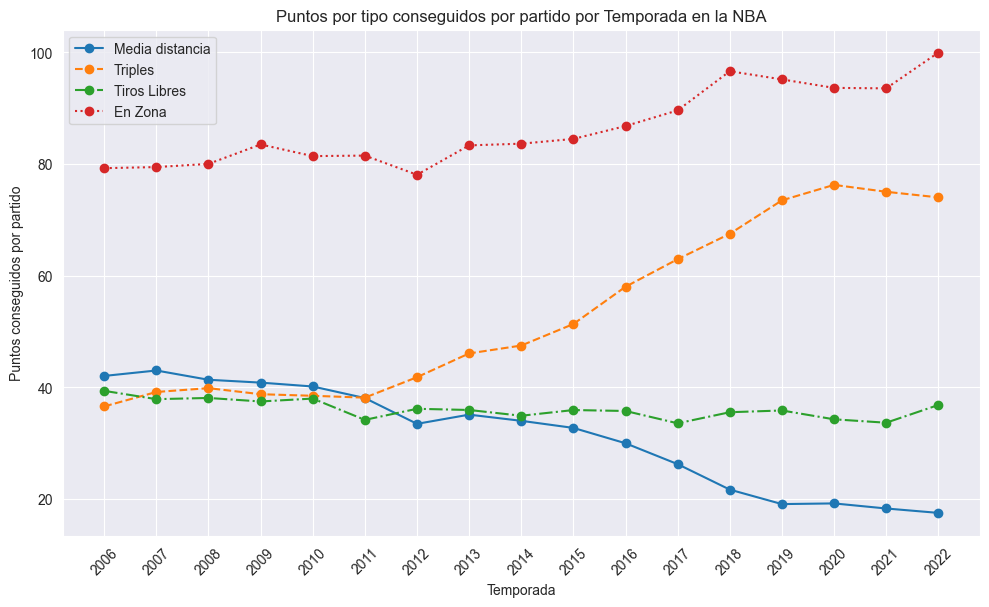

In [244]:
plt.figure(figsize=(10, 6))
plt.plot(nba_medias.Temporada, nba_medias['Media Puntos de media distancia'], marker='o', linestyle='-', label = 'Media distancia')
plt.plot(nba_medias.Temporada, nba_medias['Media Puntos Triples'], marker='o', linestyle='--', label = 'Triples')
plt.plot(nba_medias.Temporada, nba_medias['Media Puntos Tiros Libres'], marker='o', linestyle='-.', label = 'Tiros Libres')
plt.plot(nba_medias.Temporada, nba_medias['Media Puntos en Zona'], marker='o', linestyle=':', label = 'En Zona')

plt.xlabel('Temporada')
plt.ylabel('Puntos conseguidos por partido')
plt.title('Puntos por tipo conseguidos por partido por Temporada en la NBA')
plt.grid(True)

plt.tight_layout()
sns.set_style('darkgrid')
plt.xticks(rotation=45)  # Rota las etiquetas del eje x para mayor legibilidad
plt.legend()
plt.show()

* Ha habido:
1. Casi una duplicación de puntos venidos de **triples**.
2. Un 20% más de puntos desde la **zona**.
3. Un decrecimiento a la mitad de los tiros de **media distancia**.

Segundo, explorar los intentos de triples:

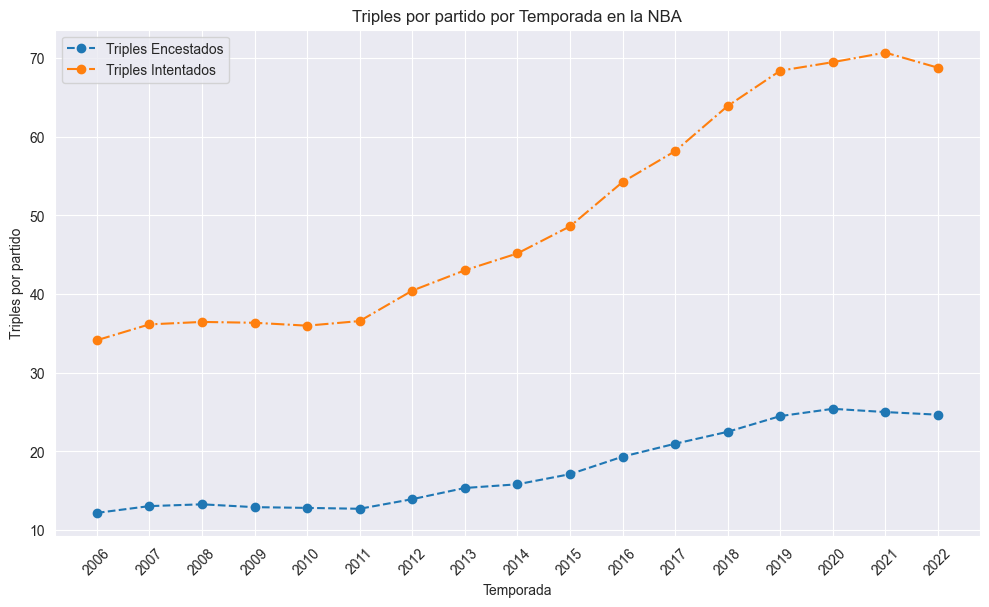

In [245]:
plt.figure(figsize=(10, 6))

plt.plot(nba_medias.Temporada, nba_medias['Media Triples encestados'], marker='o', linestyle='--', label = 'Triples Encestados')
plt.plot(nba_medias.Temporada, nba_medias['Media Triples intentados'], marker='o', linestyle='-.', label = 'Triples Intentados')

plt.xlabel('Temporada')
plt.ylabel('Triples por partido')
plt.title('Triples por partido por Temporada en la NBA')
plt.grid(True)

plt.tight_layout()
sns.set_style('darkgrid')
plt.xticks(rotation=45) 
plt.legend()
plt.show()

* Se intentan el **doble** de tiros de 3 (y por lo tanto se encestan el doble).

Tercero, a ver si se realizan más contraataques y puntos en transición, ya que la teoría es que el juego se ha acelerado.

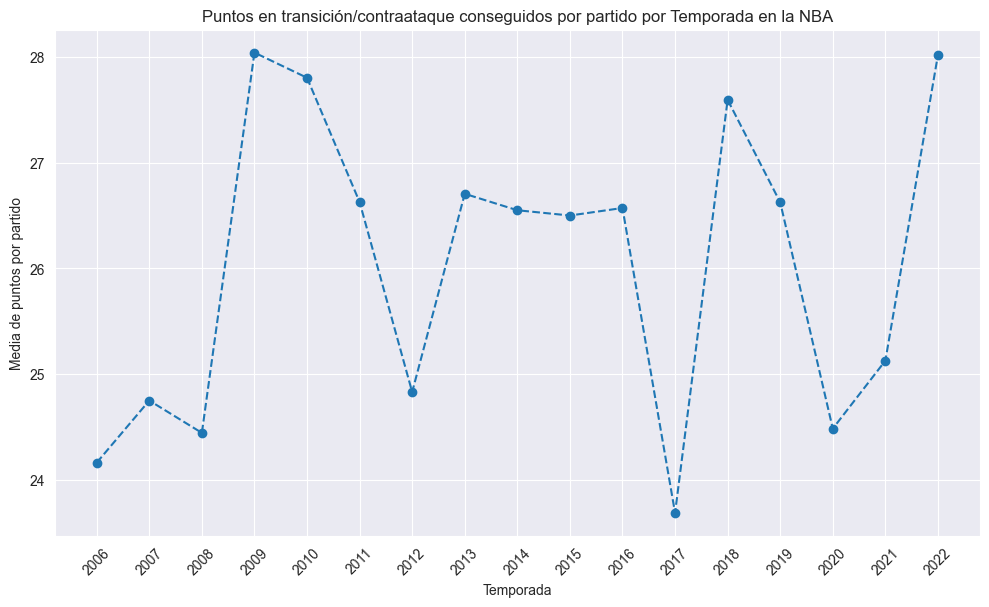

In [246]:
plt.figure(figsize=(10, 6))

plt.plot(nba_medias.Temporada, nba_medias['Media Puntos en Transición'], marker='o', linestyle='--', label = 'Puntos en transición')

plt.xlabel('Temporada')
plt.ylabel('Media de puntos por partido')
plt.title('Puntos en transición/contraataque conseguidos por partido por Temporada en la NBA')
plt.grid(True)

plt.tight_layout()
sns.set_style('darkgrid')
plt.xticks(rotation=45) 
plt.show()

* No existe una diferencia clara a lo largo de los años, así que se puede descartar la hipótesis.

Cuarto, ha habido un gran crecimiento en la cantidad de puntos por partido:

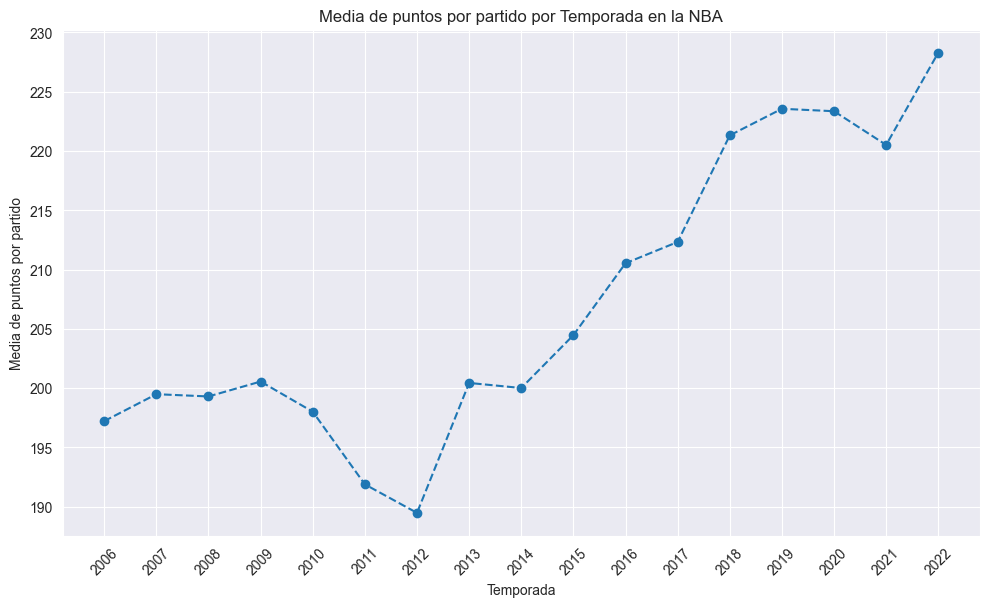

In [247]:
plt.figure(figsize=(10, 6))

plt.plot(nba_medias.Temporada, nba_medias['Media Puntos'], marker='o', linestyle='--', label = 'Puntos por partido')

plt.xlabel('Temporada')
plt.ylabel('Media de puntos por partido')
plt.title('Media de puntos por partido por Temporada en la NBA')
plt.grid(True)

plt.tight_layout()
sns.set_style('darkgrid')
plt.xticks(rotation=45) 
plt.show()

* Es bastante obvia el gran crecimiento que hay empezando en la temporada 2015-2016

### Sería interesante pie o bar charts de todas las temporadas y la composicion de los puntos por partido según tipos:

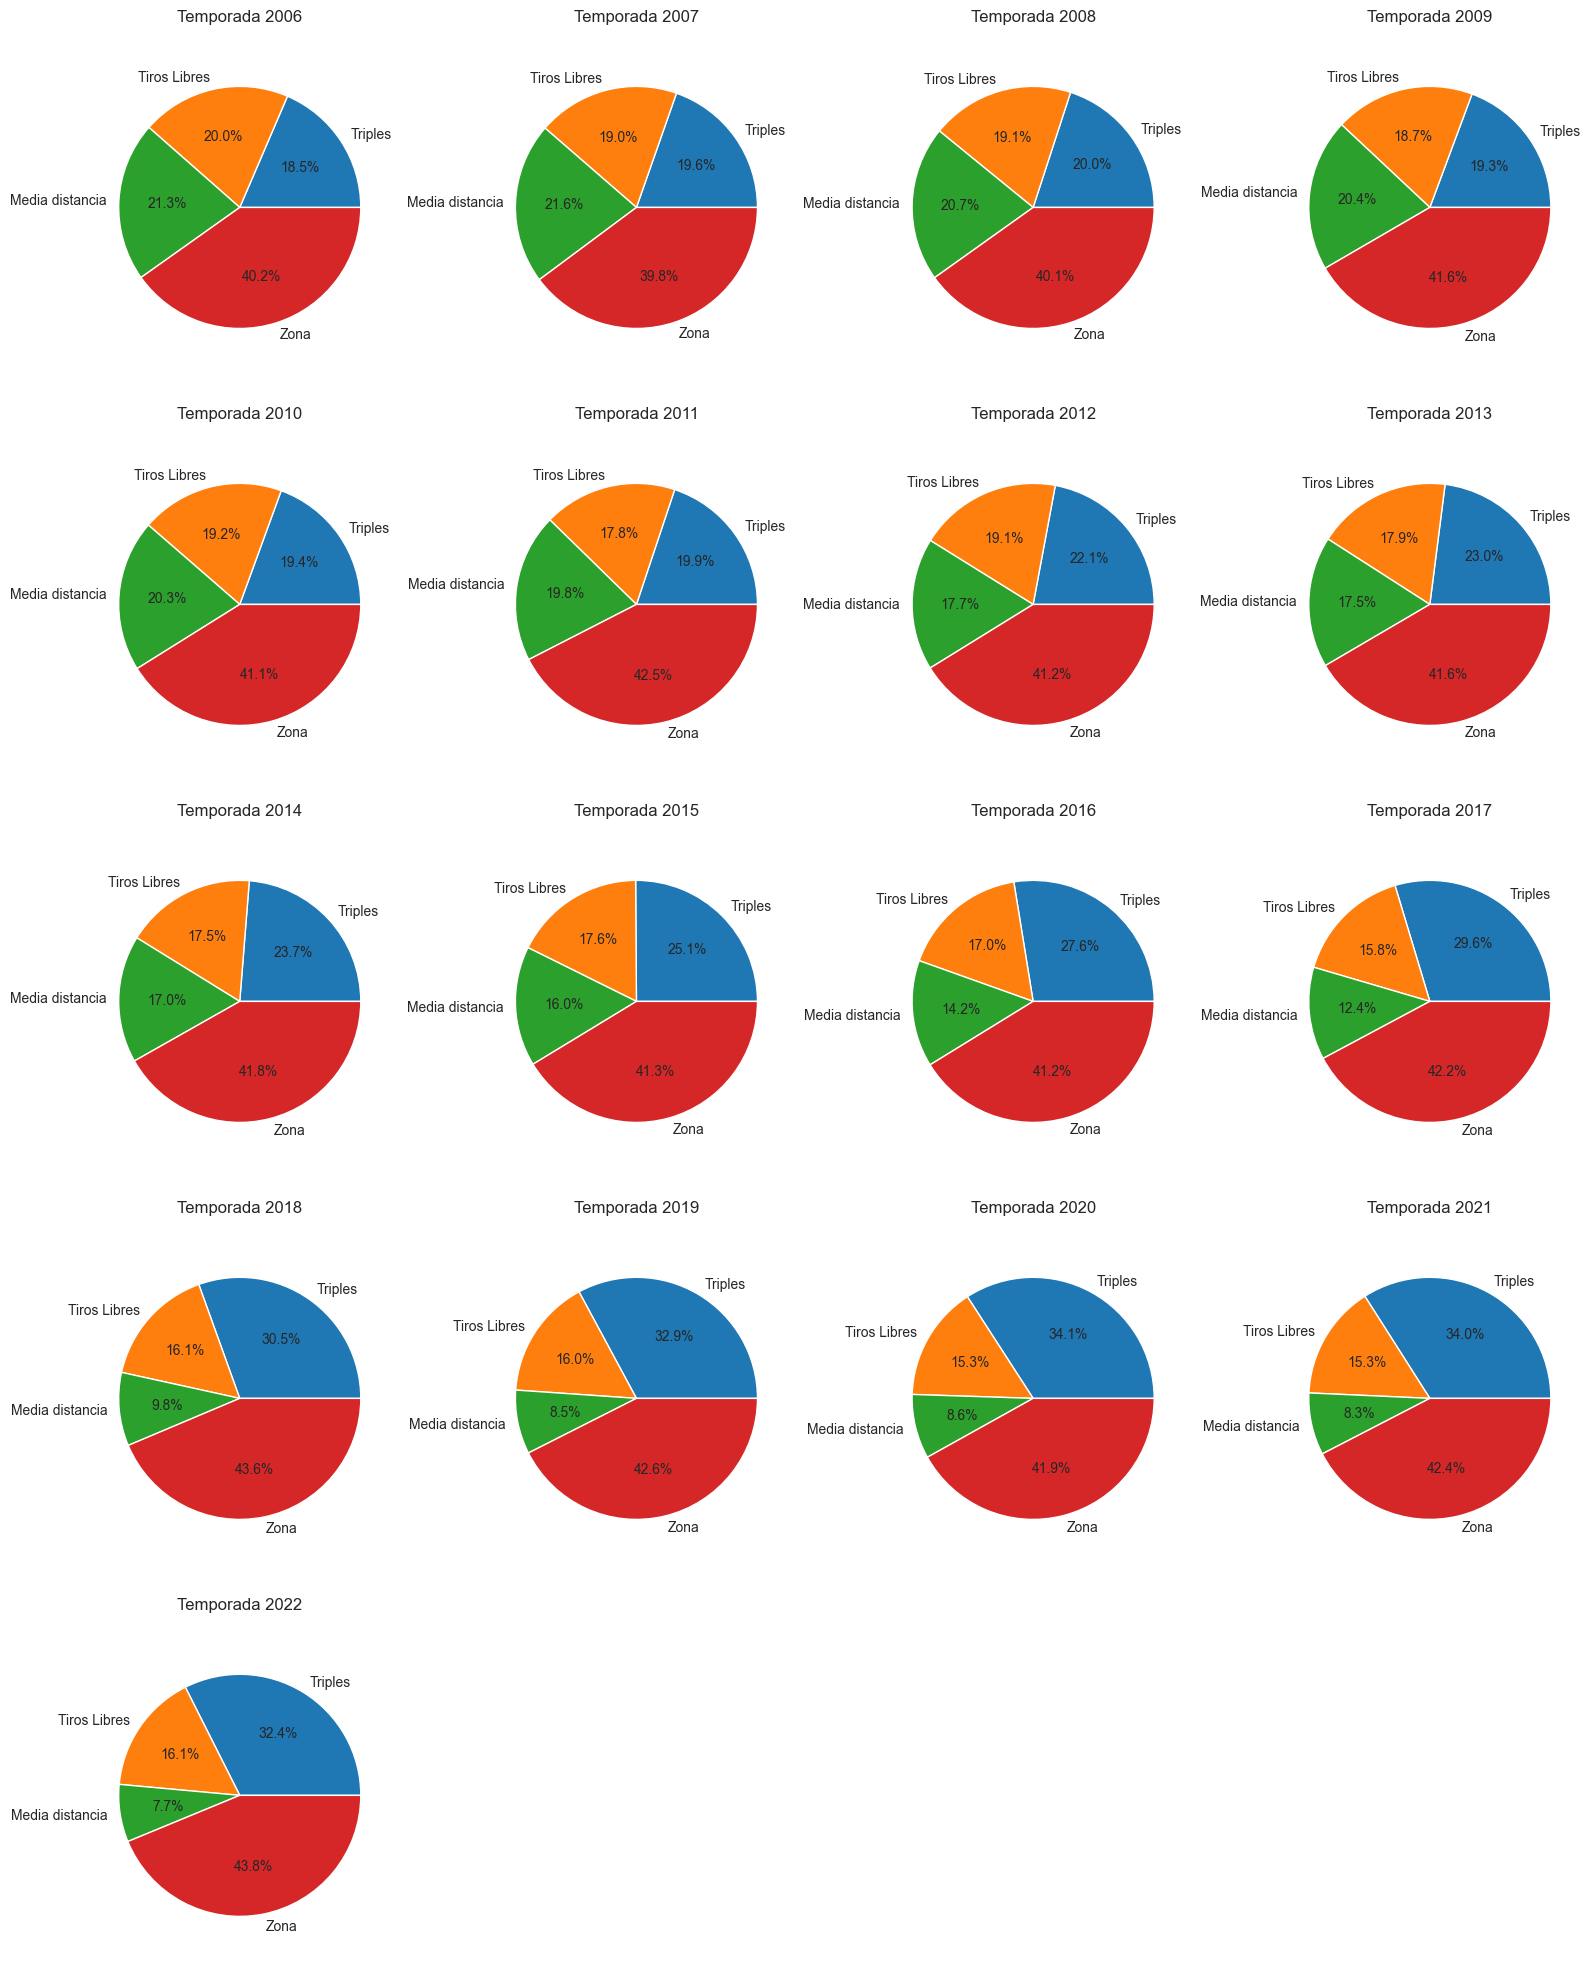

In [248]:
fig, axs = plt.subplots(5, 4, figsize=(16, 20))

for i in nba_agrupados.index:

    total_puntos_por_partido = nba_medias['Media Puntos'][i]
    puntos_por_partido_triples = nba_medias['Media Puntos Triples'][i] / total_puntos_por_partido
    puntos_por_partido_tiros_libres = nba_medias ['Media Puntos Tiros Libres'][i] / total_puntos_por_partido
    puntos_por_partido_tiros_de_2 = nba_medias['Media Puntos de media distancia'][i] / total_puntos_por_partido
    puntos_por_partido_tiros_en_zona = nba_medias['Media Puntos en Zona'][i] / total_puntos_por_partido
 
    ax = axs[i // 4, i % 4]
    ax.pie([puntos_por_partido_triples , puntos_por_partido_tiros_libres, puntos_por_partido_tiros_de_2, puntos_por_partido_tiros_en_zona],
            labels=['Triples', 'Tiros Libres', 'Media distancia', 'Zona'],
            autopct='%1.1f%%')
    ax.set_title(f'Temporada {2006+i}')
    ax.axis('equal')  # Asegura que el gráfico de pie sea un círculo
    
for i in range(17, 20):
    fig.delaxes(axs[i // 4, i % 4]) #eliminar los sobrantes que no se han pintado

plt.tight_layout()
plt.show()

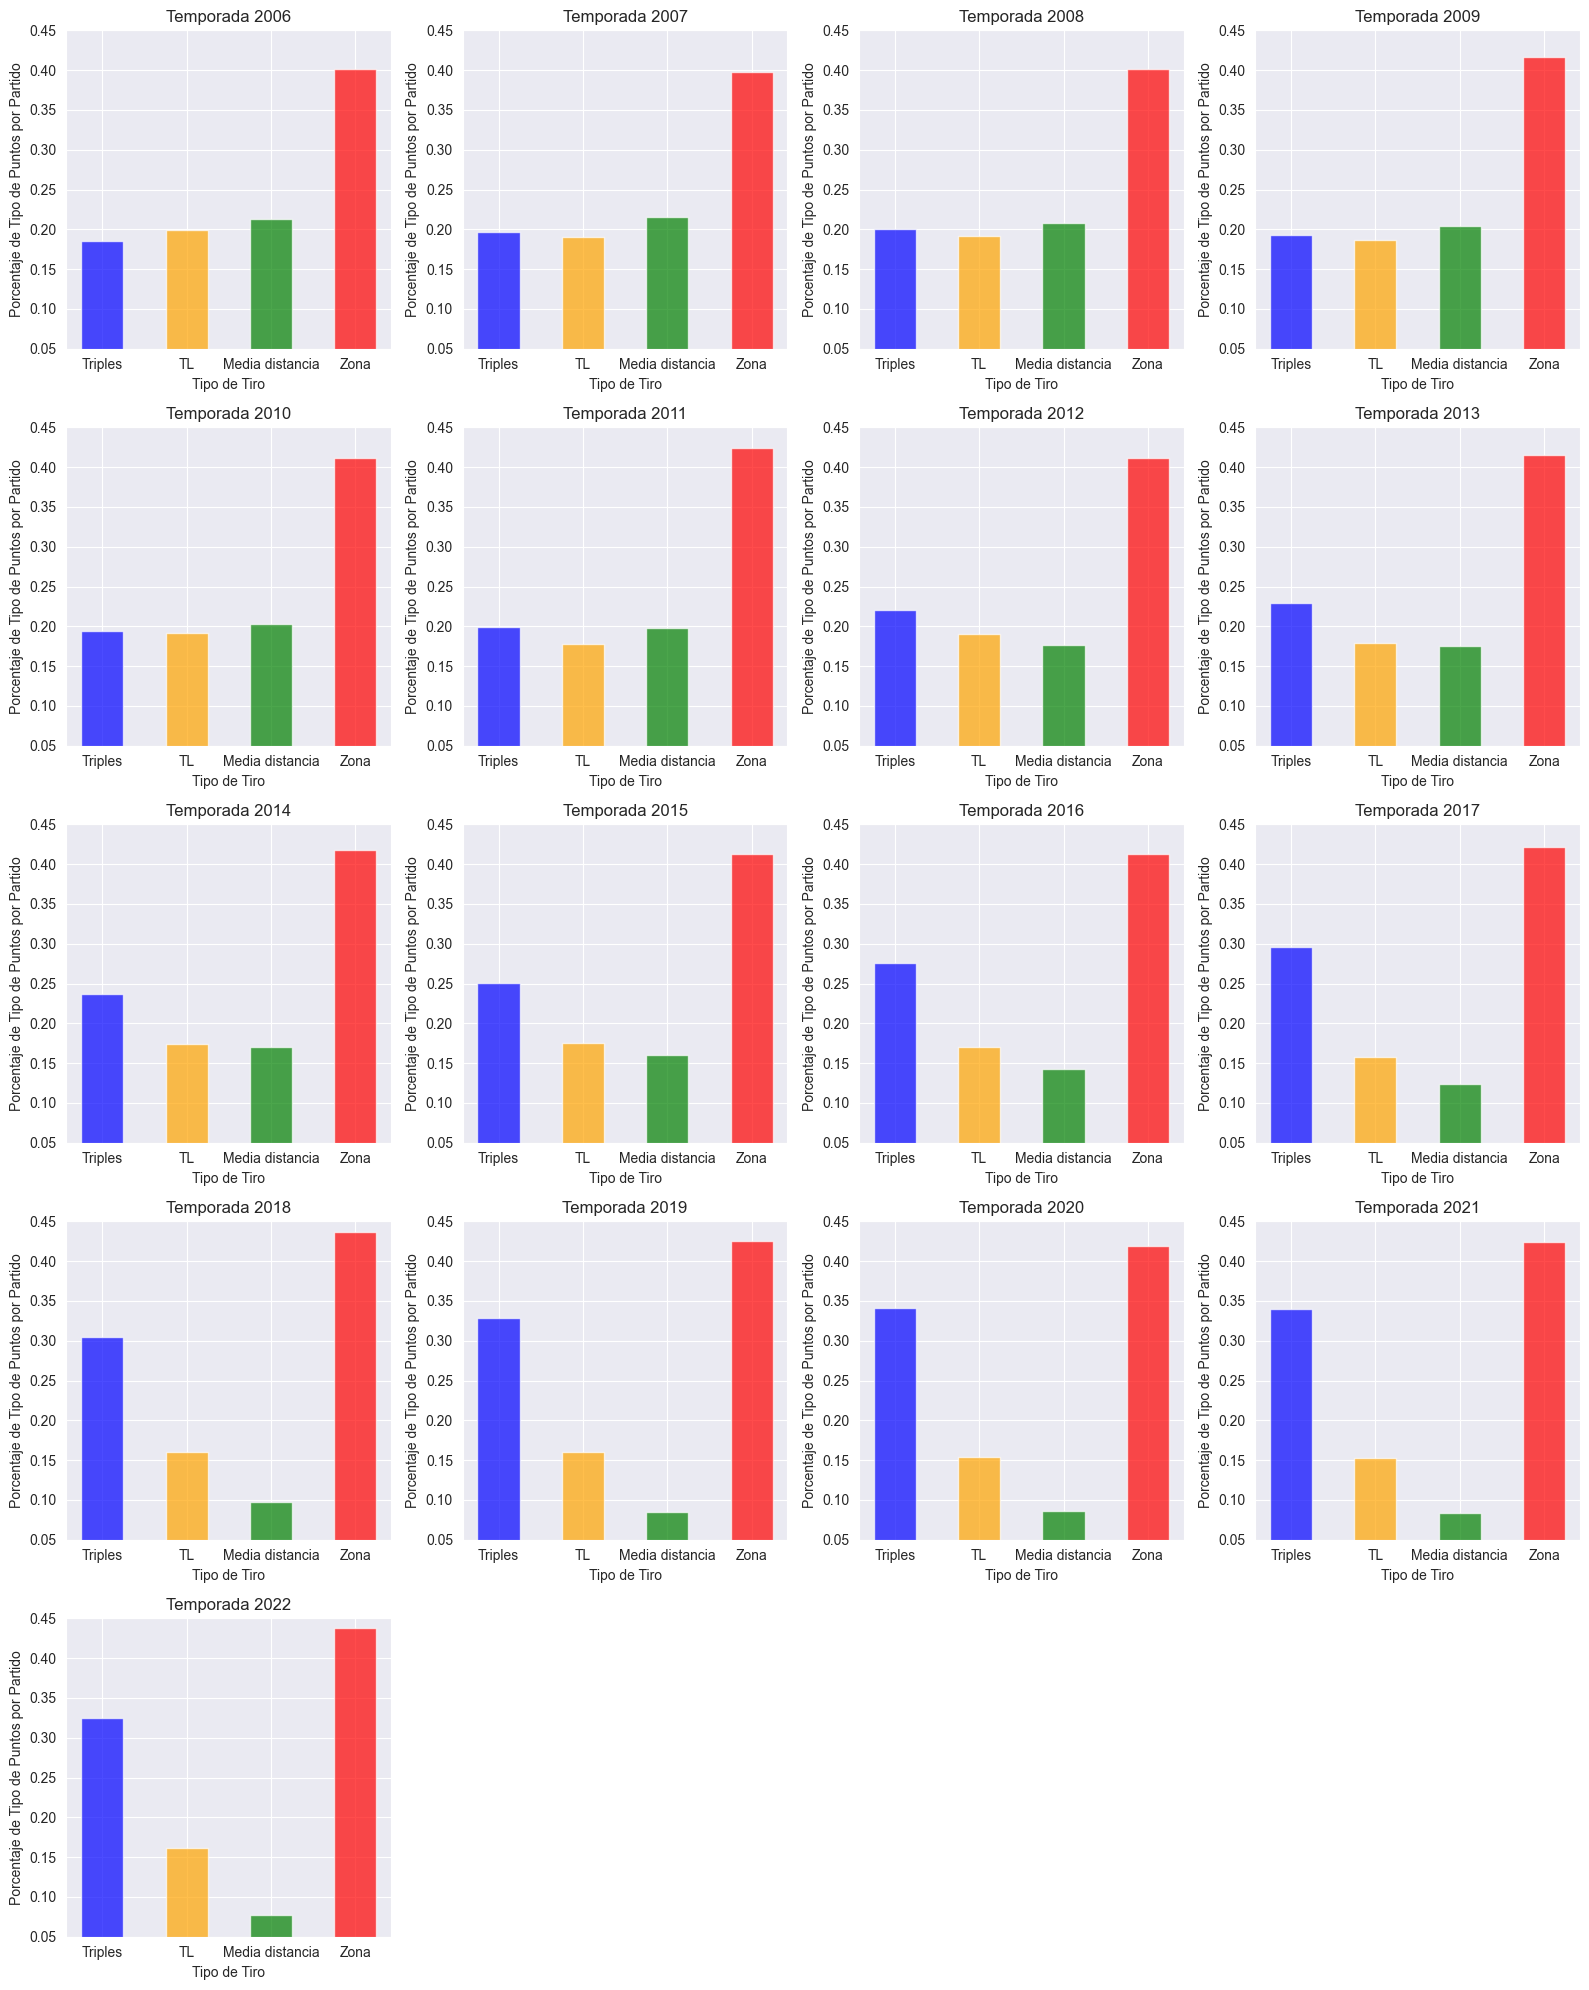

In [249]:
fig, axs = plt.subplots(5, 4, figsize=(16, 20))

for i in nba_agrupados.index:

    total_puntos_por_partido = nba_medias['Media Puntos'][i]
    puntos_por_partido_triples = nba_medias['Media Puntos Triples'][i] / total_puntos_por_partido
    puntos_por_partido_tiros_libres = nba_medias ['Media Puntos Tiros Libres'][i] / total_puntos_por_partido
    puntos_por_partido_tiros_de_2 = nba_medias['Media Puntos de media distancia'][i] / total_puntos_por_partido
    puntos_por_partido_tiros_en_zona = nba_medias['Media Puntos en Zona'][i] / total_puntos_por_partido

    ax = axs[i // 4, i % 4]
    ax.bar(['Triples', 'TL', 'Media distancia', 'Zona'],
           [puntos_por_partido_triples , puntos_por_partido_tiros_libres, puntos_por_partido_tiros_de_2, puntos_por_partido_tiros_en_zona],
            color=['blue', 'orange', 'green', 'red'],  # Cambiar colores de las barras
            alpha=0.7,  # Cambiar la transparencia de las barras
            width=0.5)  # Cambiar el ancho de las barras)
    ax.set_title(f'Temporada {2006+i}')
    ax.set_ylim(0.05, 0.45)
    ax.set_xlabel('Tipo de Tiro')
    ax.set_ylabel('Porcentaje de Tipo de Puntos por Partido')
    ax.grid(True)
    
for i in range(17, 20):
    fig.delaxes(axs[i // 4, i % 4])

plt.tight_layout()
plt.show()

* Cosas a destacar:

1. Existe un crecimiento de un 14% aprox. en puntos que vienen de tiros de triples.
2. Una reducción del 4% de puntos de tiro libre
3. Una reducción de más del 13% de puntos de media distancia
4. Los puntos desde la zona apenas se ven afectados, incluso han crecido

Esto nos guía a estas conclusiones:

1. Se tiran muchos más triples, y los puntos totales se componen más de tiros de 3.
2. Se encestan menos tiros libres.
3. La media distancia ha practicamente desaparecido, rebajándose 2 tercios de la cantidad original.
4. La proporción de puntos en la zona apenas ha variado, y se ha adaptado al aumento de puntos totales.

------------

## *Primeras conclusiones:*

* En la NBA actual, los partidos se componen de muchos más **tiros de triple**, dada la gran reducción en los puntos de media distancia, esto llevando a un aumento en las puntuaciones totales por partido

## ***4. Análisis por Equipos*** <a id="equipos"></a>

## Es el momento de especializarlo por equipos y a lo largo de pocos años antes y después del primer anillo de GSW
* He escogido, bajo mi criterio, una muestra de equipos de la NBA según conferencias que puede representar toda la NBA, distintos estilos, y con buenas posiciones en la tabla de clasificación:
#### Los equipos de la Conferencia *Oeste* escogidos (sin contar GSW) son: 
1. **Oklahoma City Thunder (OKC)**: destacando por un super equipo en 2012, y buenas puntuaciones, llegando a eliminar a los Warriors en 2010 y enfrentandose en dos finales de conferencia seguidas en las temporadas 2015-16 y 2016-17.
2. **Los Angeles Clippers (LAC)**: otro super equipo en los años 2012-2013, aunque nunca llegando a tener éxito en playoffs.
3. **Memphis Grizzlies (MEM)**: también se caracteriza por una buena presencia en los playoffs durante esos años.
4. **San Antonio Spurs (SAS)**: último ganador del anillo antes de los GSW en 2013-2014, siendo una gran muestra a la adaptación a la nueva NBA, siendo un estilo más de la vieja escuela.

#### Los equipos de la Conferencia *Este* escogidos son: 
1. **Cleveland Cavaliers (CLE)**: el mayor rival de GSW y el único que consiguió robarle un anillo en 2015-2016, justamente en la mejor temporada de la historia de un equipo, consiguiendo los Warriors un 73-9 en W-L.
2. **Toronto Raptors (TOR)**: otro equipo ahora en el Este que tuvo un equipo muy bueno reconocido, que consiguió derrotar a los Warriors al fin de su dinastía.
3. **Boston Celtics (BOS)**: un equipo mítico en reconstrucción, con cambio de entrenador en 2012 que le llevó a destacar en la conferencia Este, y ser de los mejores actualmente.
4. **Miami Heat (MIA)**: ganadores de varios anillos en el periodo anterior a GSW liderados por LeBron, Bosh y Wade, el gran Big 3 de la NBA.

* Creo una lista de dataframes con solo los datos según equipos:

In [257]:
teams = []
lista_equipos = ['GSW', 'LAC', 'MEM', 'SAS', 'MIN', 'CLE', 'TOR', 'BOS', 'MIA']
for equipo in lista_equipos:
    muestra = nba[(nba.Local == equipo) | (nba.Visitante == equipo)]
    teams.append(muestra)

#### Me quedo con los datos que me interesan por equipo:
1. Puntos
2. Puntos en zona
3. Tiros libres
4. Puntos de triple
5. Triples intentados
6. Puntos de media distancia

In [258]:
for i, equipo in enumerate(lista_equipos):
    for j,valor in teams[i].Local.items():
        if lista_equipos[i] == valor:
            teams[i][f'Puntos'] = teams[i]['Puntos Local']
            teams[i][f'Puntos en Zona'] = teams[i]['Puntos en zona Local']
            teams[i][f'Tiros Libres'] = teams[i]['Tiros libres Local']
            teams[i][f'Puntos de 3'] = teams[i]['Triples Local']*3
            teams[i][f'Triples intentados'] = teams[i]['Triples intentados Local']
            teams[i][f'Puntos de media distancia'] = teams[i]['Puntos de media distancia Local']
        else:
            teams[i][f'Puntos'] = teams[i]['Puntos Visitante']
            teams[i][f'Puntos en Zona'] = teams[i]['Puntos en zona Visitante']
            teams[i][f'Tiros Libres'] = teams[i]['Tiros libres Visitante']
            teams[i][f'Puntos de 3'] = teams[i]['Triples Visitante']*3
            teams[i][f'Triples intentados'] = teams[i]['Triples intentados Visitante']
            teams[i][f'Puntos de media distancia'] = teams[i]['Puntos de media distancia Visitante']
            
    columnas_a_conservar = ['Partido','Local','Visitante','Temporada',f'Puntos',f'Tiros Libres',f'Puntos en Zona', f'Puntos de 3',f'Triples intentados',f'Puntos de media distancia']
    teams[i] = teams[i][columnas_a_conservar]
clear_output()

* Una muestra de un dataframe:

In [259]:
teams[0].head()

,Partido,Local,Visitante,Temporada,Puntos,Tiros Libres,Puntos en Zona,Puntos de 3,Triples intentados,Puntos de media distancia
6,GSW vs. LAL,GSW,LAL,2006,98.0,27.0,44.0,9.0,19.0,18.0
21,GSW vs. POR,GSW,POR,2006,102.0,21.0,58.0,15.0,11.0,8.0
34,UTA vs. GSW,GSW,UTA,2006,106.0,15.0,36.0,15.0,11.0,40.0
41,DAL vs. GSW,DAL,GSW,2006,104.0,17.0,44.0,33.0,30.0,10.0
48,NOK vs. GSW,GSW,NOK,2006,97.0,15.0,44.0,18.0,15.0,20.0


#### Ahora agrupo todos los dataframes por temporada:

In [260]:
teams_agrupados = []
for i in range(len(lista_equipos)):
    muestra = []
    muestra = teams[i].groupby('Temporada').sum()
    teams_agrupados.append(muestra)
    teams_agrupados[i]['Partidos por Temporada'] = teams[i]['Temporada'].value_counts()
    columnas_a_eliminar = ['Partido','Local','Visitante']
    teams_agrupados[i] = teams_agrupados[i].drop(columns=columnas_a_eliminar)

### Y hago otro dataframe (el que será analizado) con las medias:

In [261]:
teams_medias = []
for i, equipo in enumerate(lista_equipos):
    muestra = pd.DataFrame()
    teams_medias.append(muestra)
    teams_medias[i][f'Media Puntos'] = (teams_agrupados[i][f'Puntos'])/(teams_agrupados[i]['Partidos por Temporada'])
    teams_medias[i][f'Media Puntos Triples'] = teams_agrupados[i][f'Puntos de 3']/teams_agrupados[i]['Partidos por Temporada']
    teams_medias[i][f'Media Triples intentados'] = teams_agrupados[i][f'Triples intentados']/teams_agrupados[i]['Partidos por Temporada']
    teams_medias[i][f'Media Triples encestados'] = (teams_agrupados[i][f'Puntos de 3']/3)/teams_agrupados[i]['Partidos por Temporada']
    teams_medias[i][f'Media Puntos de media distancia'] = teams_agrupados[i][f'Puntos de media distancia']/teams_agrupados[i]['Partidos por Temporada']
    teams_medias[i][f'Media Tiros Libres'] = teams_agrupados[i][f'Tiros Libres']/teams_agrupados[i]['Partidos por Temporada']
    teams_medias[i][f'Media Puntos en Zona'] = teams_agrupados[i][f'Puntos en Zona']/teams_agrupados[i]['Partidos por Temporada']

In [262]:
for i in range(len(lista_equipos)):
    teams_medias[i] = teams_medias[i].reset_index()

* Convertimos las temporadas en números enteros

In [263]:
for i in range(len(lista_equipos)):
    teams_medias[i].Temporada = teams_medias[i].Temporada.astype(int)

In [264]:
teams_medias[0].head()

,Temporada,Media Puntos,Media Puntos Triples,Media Triples intentados,Media Triples encestados,Media Puntos de media distancia,Media Tiros Libres,Media Puntos en Zona
0,2006,111.356164,26.136986,22.547945,8.712329,17.589041,21.931507,45.698630
1,2007,111.324675,24.740260,23.415584,8.246753,19.870130,20.298701,46.415584
2,2008,112.746032,20.666667,17.619048,6.888889,22.698413,22.936508,46.444444
3,2009,112.608108,21.243243,18.959459,7.081081,24.243243,21.878378,45.243243
4,2010,107.698795,24.253012,20.891566,8.084337,19.831325,19.879518,43.734940


* Ahora ya con las medias conseguidas para cualquier equipo, se puede empezar a hacer gráficas:

### *El orden es: 'GSW' (0), 'LAC' (1), 'MEM' (2), 'SAS' (3), 'POR' (4), 'CLE' (5), 'TOR' (6), 'BOS' (7), 'MIA' (8)*

### La hipótesis entonces por equipos es:
#### Se produjo una subida en los GSW en:
#### 1. Los puntos viniendo de **triple**.
#### 2. El aumento de **puntos por partido**, a partir de la temporada 12-13 (cuando ya Curry estaba acompañado por su equipo), empezando a carburar durante 2 años, consiguiendo su primer anillo (de 3 totales) en el 14-15, y causando que la NBA se adaptara a ellos buscando lo mismo.

#### Comparación de puntos de triples en la Conferencia **OESTE y ESTE**:

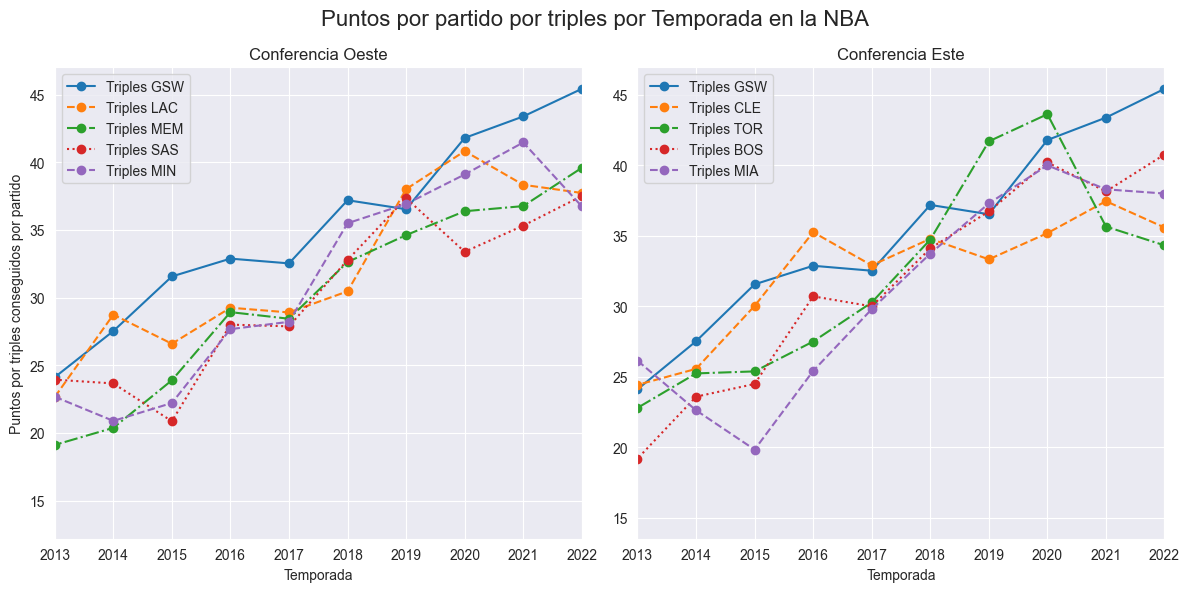

In [265]:
fig, axs = plt.subplots(1,2, figsize = (12,6))
fig.suptitle('Puntos por partido por triples por Temporada en la NBA', fontsize=16)

axs[0].plot(teams_medias[0].Temporada, teams_medias[0]['Media Puntos Triples'], marker='o', linestyle='-', label = 'Triples GSW')
axs[0].plot(teams_medias[1].Temporada, teams_medias[1]['Media Puntos Triples'], marker='o', linestyle='--', label = 'Triples LAC')
axs[0].plot(teams_medias[2].Temporada, teams_medias[2]['Media Puntos Triples'], marker='o', linestyle='-.', label = 'Triples MEM')
axs[0].plot(teams_medias[3].Temporada, teams_medias[3]['Media Puntos Triples'], marker='o', linestyle=':', label = 'Triples SAS')
axs[0].plot(teams_medias[4].Temporada, teams_medias[4]['Media Puntos Triples'], marker='o', linestyle='dashed', label = 'Triples MIN')

axs[0].set_xlabel('Temporada')
axs[0].set_xlim([2013,2022])
axs[0].set_ylabel('Puntos por triples conseguidos por partido')
axs[0].set_title('Conferencia Oeste')
axs[0].grid(True)

plt.tight_layout()
axs[0].legend()

axs[1].plot(teams_medias[0].Temporada, teams_medias[0]['Media Puntos Triples'], marker='o', linestyle='-', label = 'Triples GSW')
axs[1].plot(teams_medias[5].Temporada, teams_medias[5]['Media Puntos Triples'], marker='o', linestyle='--', label = 'Triples CLE')
axs[1].plot(teams_medias[6].Temporada, teams_medias[6]['Media Puntos Triples'], marker='o', linestyle='-.', label = 'Triples TOR')
axs[1].plot(teams_medias[7].Temporada, teams_medias[7]['Media Puntos Triples'], marker='o', linestyle=':', label = 'Triples BOS')
axs[1].plot(teams_medias[8].Temporada, teams_medias[8]['Media Puntos Triples'], marker='o', linestyle='dashed', label = 'Triples MIA')

# Configuraciones adicionales
axs[1].set_xlabel('Temporada')
axs[1].set_xlim([2013,2022])
axs[1].set_title('Conferencia Este')
axs[1].grid(True)

plt.tight_layout()
axs[1].legend()

plt.show()

* **Clippers** experimenta la misma subida que GSW en 2014 pero luego se estanca, volviendo a subir en 2016.
* Es clara la subida en **Minnesota** en 2016, 2 temporadas después del primer anillo de GSW.
* **Memphis** se adaptó mejor, con una subida parecida a GSW y muy brusca en 2016 (después de la temporada 73-9 de GSW), aunque venía de una cantidad menor
* **Spurs** también empezó subiendo en 2016

* No se puede sacar nada en claro de CLE con respecto a triples, experimenta una subida similar que GSW (son sus mayores rivales, tal vez por eso pudieron ganarles)
* En TOR la subida llega tiempo después, de forma muy progresiva
* En BOS se produce una subida similar a GSW pero desde más abajo, pero la subida más brusca ocurre en 2016 igual
* En MIA la subida se produce en 2016 también

#### Comparación de puntos totales en la conferencia **OESTE y ESTE**:

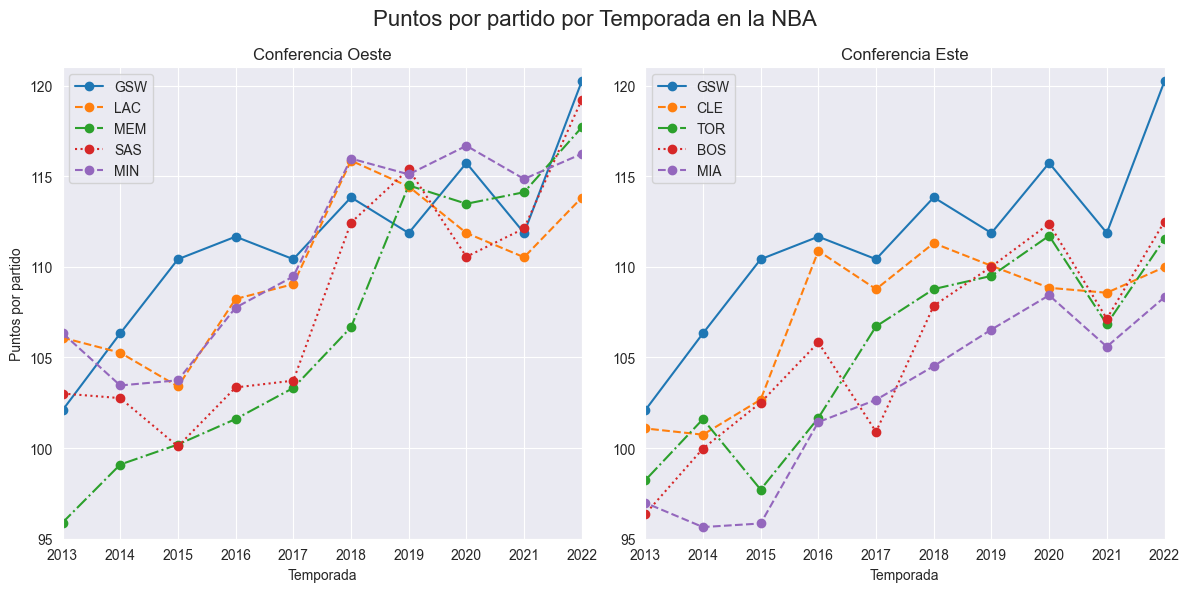

In [266]:
fig, axs = plt.subplots(1,2, figsize = (12,6))
fig.suptitle('Puntos por partido por Temporada en la NBA', fontsize=16)

axs[0].plot(teams_medias[0].Temporada, teams_medias[0]['Media Puntos'], marker='o', linestyle='-', label = 'GSW')
axs[0].plot(teams_medias[1].Temporada, teams_medias[1]['Media Puntos'], marker='o', linestyle='--', label = 'LAC')
axs[0].plot(teams_medias[2].Temporada, teams_medias[2]['Media Puntos'], marker='o', linestyle='-.', label = 'MEM')
axs[0].plot(teams_medias[3].Temporada, teams_medias[3]['Media Puntos'], marker='o', linestyle=':', label = 'SAS')
axs[0].plot(teams_medias[4].Temporada, teams_medias[4]['Media Puntos'], marker='o', linestyle='dashed', label = 'MIN')

# Configuraciones adicionales
axs[0].set_xlabel('Temporada')
axs[0].set_ylabel('Puntos por partido')
axs[0].set_xlim(2013,2022)
axs[0].set_ylim(95,121)
axs[0].set_title('Conferencia Oeste')
axs[0].grid(True)

plt.tight_layout()
axs[0].legend()

axs[1].plot(teams_medias[0].Temporada, teams_medias[0]['Media Puntos'], marker='o', linestyle='-', label = 'GSW')
axs[1].plot(teams_medias[5].Temporada, teams_medias[5]['Media Puntos'], marker='o', linestyle='--', label = 'CLE')
axs[1].plot(teams_medias[6].Temporada, teams_medias[6]['Media Puntos'], marker='o', linestyle='-.', label = 'TOR')
axs[1].plot(teams_medias[7].Temporada, teams_medias[7]['Media Puntos'], marker='o', linestyle=':', label = 'BOS')
axs[1].plot(teams_medias[8].Temporada, teams_medias[8]['Media Puntos'], marker='o', linestyle='dashed', label = 'MIA')

# Configuraciones adicionales
axs[1].set_xlabel('Temporada')
axs[1].set_xlim(2013,2022)
axs[1].set_ylim(95,121)
axs[1].set_title('Conferencia Este')
axs[1].grid(True)

# Mostrar el gráfico
plt.tight_layout()
axs[1].legend()

plt.xlim([2013,2022])
plt.show()

Se ve claramente en la conferencia ***Oeste*** una subida mucho más brusca de parte de GSW de los años 2014 a 2016 que todos los demás.

En la conferencia ***Este***, esta adaptación será más lenta que el Oeste (al no coincidir con GSW directamente).
- Para **Miami** se ve claramente la subida a partir de 2016. 
- Para **Cleveland** se ve exactamente lo mismo (aunque no pasara lo mismo con respecto a los triples).
- Para **Toronto**, aun habiendo una subida similar en 2014, existe la misma bajada en 2015 para volver en 2016
- **Boston** parece la excepción, justo coincidiendo con la llegada de Brad Stevens como entrenador en 2013 para darle una vuelta al equipo.

### Ahora me centraré en las temporadas 2013-14 a 2016-17 con respecto a puntos de triples y puntos totales:

In [267]:
for i in range(len(lista_equipos)):
    teams_medias[i] = teams_medias[i].set_index('Temporada')

In [268]:
teams_medias_temporadas = []
for i in range(len(teams_medias)):
    muestra = teams_medias[i].drop([2006,2007,2008,2009,2010,2011,2012,2017,2018,2019,2020,2021,2022])
    teams_medias_temporadas.append(muestra)

In [269]:
for i in range(len(lista_equipos)):
    teams_medias_temporadas[i] = teams_medias_temporadas[i].reset_index()

In [270]:
teams_medias_temporadas[0]

,Temporada,Media Puntos,Media Puntos Triples,Media Triples intentados,Media Triples encestados,Media Puntos de media distancia,Media Tiros Libres,Media Puntos en Zona
0,2013,102.089744,24.115385,22.230769,8.038462,19.384615,17.666667,40.923077
1,2014,106.329897,27.525773,24.082474,9.175258,17.030928,18.432990,43.340206
2,2015,110.418367,31.561224,27.469388,10.520408,17.163265,18.775510,42.918367
3,2016,111.663265,32.877551,29.632653,10.959184,14.122449,18.255102,46.408163


* Creo un diccionario únicamente con motivo de pintar en el futuro:

In [271]:
dicc_iterar = {
    '0': 7,
    '1': 8,
    '2': 9,
    '3': 10
}

* Recordamos que el orden es: 'GSW' (0), 'LAC' (1), 'MEM' (2), 'SAS' (3), 'MIN' (4), 'CLE' (5), 'TOR' (6), 'BOS' (7), 'MIA' (8)

### Gráfico de barras de las **temporadas 2013-14 a 2016-17** de los puntos por triples de todos los equipos escogidos.

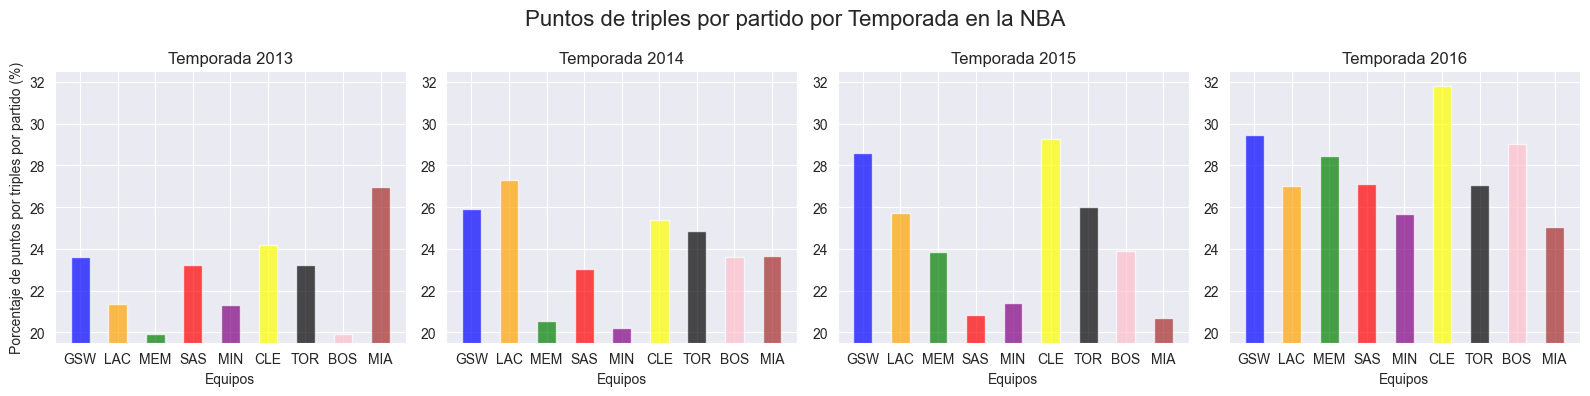

In [272]:
fig, axs = plt.subplots(1, 4, figsize=(16, 4))
fig.suptitle('Puntos de triples por partido por Temporada en la NBA', fontsize=16)

for i, valor in dicc_iterar.items():
    i = int(i)
    total_puntos_por_partido_gsw = teams_medias_temporadas[0]['Media Puntos'][i]
    puntos_por_partido_triples_gsw = (teams_medias_temporadas[0]['Media Puntos Triples'][i] / total_puntos_por_partido_gsw)*100
    total_puntos_por_partido_lac = teams_medias_temporadas[1]['Media Puntos'][i]
    puntos_por_partido_triples_lac = (teams_medias_temporadas[1]['Media Puntos Triples'][i] / total_puntos_por_partido_lac)*100
    total_puntos_por_partido_mem = teams_medias_temporadas[2]['Media Puntos'][i]
    puntos_por_partido_triples_mem = (teams_medias_temporadas[2]['Media Puntos Triples'][i] / total_puntos_por_partido_mem)*100
    total_puntos_por_partido_sas = teams_medias_temporadas[3]['Media Puntos'][i]
    puntos_por_partido_triples_sas = (teams_medias_temporadas[3]['Media Puntos Triples'][i] / total_puntos_por_partido_sas)*100
    total_puntos_por_partido_min = teams_medias_temporadas[4]['Media Puntos'][i]
    puntos_por_partido_triples_min = (teams_medias_temporadas[4]['Media Puntos Triples'][i] / total_puntos_por_partido_min)*100
    total_puntos_por_partido_cle = teams_medias_temporadas[5]['Media Puntos'][i]
    puntos_por_partido_triples_cle = (teams_medias_temporadas[5]['Media Puntos Triples'][i] / total_puntos_por_partido_cle)*100
    total_puntos_por_partido_tor = teams_medias_temporadas[6]['Media Puntos'][i]
    puntos_por_partido_triples_tor = (teams_medias_temporadas[6]['Media Puntos Triples'][i] / total_puntos_por_partido_tor)*100
    total_puntos_por_partido_bos = teams_medias_temporadas[7]['Media Puntos'][i]
    puntos_por_partido_triples_bos = (teams_medias_temporadas[7]['Media Puntos Triples'][i] / total_puntos_por_partido_bos)*100
    total_puntos_por_partido_mia = teams_medias_temporadas[8]['Media Puntos'][i]
    puntos_por_partido_triples_mia = (teams_medias_temporadas[8]['Media Puntos Triples'][i] / total_puntos_por_partido_mia)*100
    
    axs[i].bar(['GSW', 'LAC', 'MEM', 'SAS', 'MIN', 'CLE', 'TOR', 'BOS', 'MIA'],
            [puntos_por_partido_triples_gsw, puntos_por_partido_triples_lac, puntos_por_partido_triples_mem, puntos_por_partido_triples_sas, puntos_por_partido_triples_min, puntos_por_partido_triples_cle, puntos_por_partido_triples_tor, puntos_por_partido_triples_bos, puntos_por_partido_triples_mia],
            color=['blue', 'orange', 'green', 'red', 'purple', 'yellow', 'black', 'pink', 'brown'],  # Cambiar colores de las barras
            alpha=0.7,  # Cambiar la transparencia de las barras
            width=0.5)  # Cambiar el ancho de las barras)
    axs[i].set_title(f'Temporada {2006+valor}')
    axs[i].set_ylim(19.5, 32.5)
    axs[i].set_xlabel('Equipos')
    
axs[0].set_ylabel('Porcentaje de puntos por triples por partido (%)')
plt.tight_layout()
plt.show()

* Se aprecia claramente una subida de los puntos de triples de parte de **GSW** en la temporada 2014 (su primer anillo), seguida en mayormente 2016 por todos los demás equipos. 

* **Cleveland** parece ser la excepción (el único equipo que les ganó, puede que sea motivo de ello)

* **Clippers** también pero sin éxito

### Gráfico de barras de las **temporadas 2013-14 a 2016-17** de los puntos totales de todos los equipos escogidos.

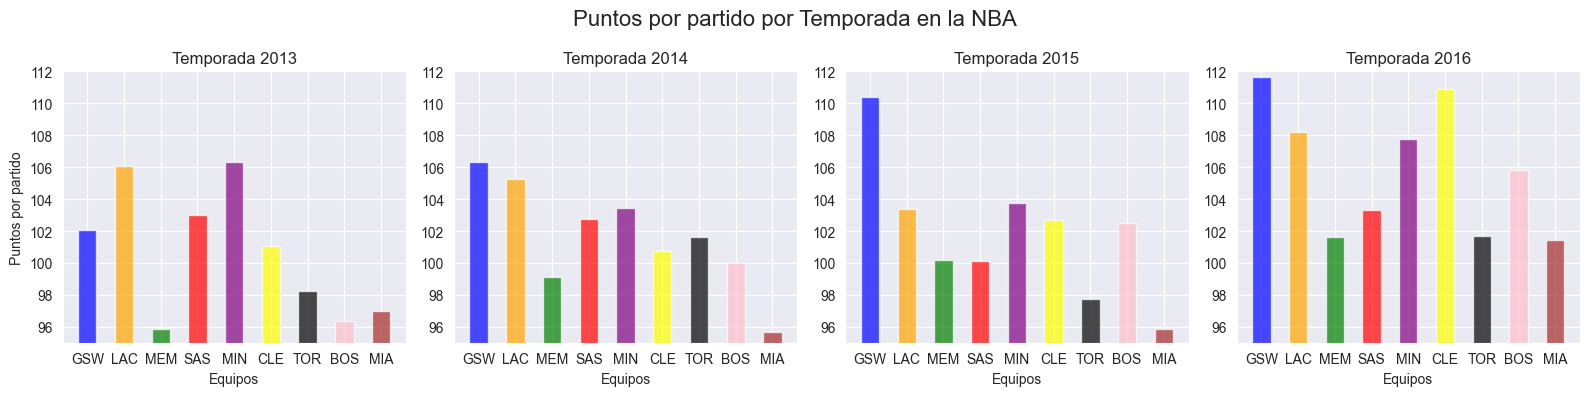

In [273]:
fig, axs = plt.subplots(1, 4, figsize=(16, 4))
fig.suptitle('Puntos por partido por Temporada en la NBA', fontsize=16)

for i, valor in dicc_iterar.items():
    i = int(i)
    total_puntos_por_partido_gsw = teams_medias_temporadas[0]['Media Puntos'][i]
    total_puntos_por_partido_lac = teams_medias_temporadas[1]['Media Puntos'][i]
    total_puntos_por_partido_mem = teams_medias_temporadas[2]['Media Puntos'][i]
    total_puntos_por_partido_sas = teams_medias_temporadas[3]['Media Puntos'][i]
    total_puntos_por_partido_min = teams_medias_temporadas[4]['Media Puntos'][i]
    total_puntos_por_partido_cle = teams_medias_temporadas[5]['Media Puntos'][i]
    total_puntos_por_partido_tor = teams_medias_temporadas[6]['Media Puntos'][i]
    total_puntos_por_partido_bos = teams_medias_temporadas[7]['Media Puntos'][i]
    total_puntos_por_partido_mia = teams_medias_temporadas[8]['Media Puntos'][i]

    axs[i].bar(['GSW', 'LAC', 'MEM', 'SAS', 'MIN', 'CLE', 'TOR', 'BOS', 'MIA'],
            [total_puntos_por_partido_gsw, total_puntos_por_partido_lac, total_puntos_por_partido_mem, total_puntos_por_partido_sas, total_puntos_por_partido_min, total_puntos_por_partido_cle, total_puntos_por_partido_tor, total_puntos_por_partido_bos, total_puntos_por_partido_mia],
            color=['blue', 'orange', 'green', 'red', 'purple', 'yellow', 'black', 'pink', 'brown'],  # Cambiar colores de las barras
            alpha=0.7,  # Cambiar la transparencia de las barras
            width=0.5)  # Cambiar el ancho de las barras)
    axs[i].set_title(f'Temporada {2006+valor}')
    axs[i].set_ylim(95, 112)
    axs[i].set_xlabel('Equipos')

axs[0].set_ylabel('Puntos por partido')
plt.tight_layout()
plt.show()

Aquí se aprecia ya la diferencia total para todos los equipos:

* Los **GSW** experimentaron una subida en el 2014-2015 y 2015-2016, no seguida por ningún equipo

* Los **Cavaliers** consiguieron equipararse en 2016-2017 también en puntos por partido (recordamos que eran la excepción en triples), después de que consiguieran ganarles en las Finales en una remontada histórica

* **Todos los demás equipos** se adaptaron con el tiempo igual

## ***5. Conclusiones*** <a id="conclusiones"></a>

### 1. **Stephen Curry** llegó a la NBA a unos Golden State Warriors que llevaban tiempo sin destacar, lleno de jóvenes y con un proyecto.

![Curry joven](./img/Curry1Destacada-1.jpg)

### 2. Los drafts y traspasos de Klay Thompson, Harrison Barnes, André Iguodala y Draymond Green (y en 2016 Kevin Durant) hicieron que el equipo cuajara por completo, consiguiendo su **primer anillo** en la temporada 2014-2015, y consiguiendo 3 de 4 durante los siguientes años.

![Curry joven](./img/1298865441.0.jpg)

### 3. El único equipo que consiguió derrotarles durante su auge fueron los **Cleveland Cavaliers de LeBron James**, equipo que consiguió mantener el ritmo en la aportación del tiro de 3 a la puntuación total.


![Curry joven](./img/AP_649535383326-1024x773.jpg)

### 4. Los demás equipos se tuvieron que adaptar los años próximos al estilo de los Warriors, siendo más fácil esto para la Conferencia Oeste que para la Este. Se aprecia un crecimiento parecido al de GSW en las puntuaciones totales y del tiro de triple con un retraso de **2 años** mayormente (a partir de 2016-2017).

### 5. La actualidad se compone mayoritariamente de equipos con **buenos tiradores** (se tiran y encestan el doble de triples), presión exterior y mucho movimiento de balón, con un **abandono dramático del tiro de media distancia (reducción de más del 60%)**


![Curry joven](./img/Captura%20de%20pantalla%202024-04-18%20a%20las%2018.03.33.png)